In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("House_Price_India.csv")
data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Built Year,Postal Code,Price
0,4,2.50,2920,4000,1.5,5,8,1910,1909,122004,1400000
1,5,2.75,2910,9480,1.5,3,8,2910,1939,122004,1200000
2,4,2.50,3310,42998,2.0,3,9,3310,2001,122005,838000
3,3,2.00,2710,4500,1.5,4,8,1880,1929,122006,805000
4,3,2.50,2600,4750,1.0,4,9,1700,1951,122007,790000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  int64  
 1   number of bathrooms                    14619 non-null  float64
 2   living area                            14619 non-null  int64  
 3   lot area                               14619 non-null  int64  
 4   number of floors                       14619 non-null  float64
 5   condition of the house                 14619 non-null  int64  
 6   grade of the house                     14619 non-null  int64  
 7   Area of the house(excluding basement)  14619 non-null  int64  
 8   Built Year                             14619 non-null  int64  
 9   Postal Code                            14619 non-null  int64  
 10  Price                                  14619 non-null  int64  
dtypes:

In [4]:
data.dropna()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Built Year,Postal Code,Price
0,4,2.50,2920,4000,1.5,5,8,1910,1909,122004,1400000
1,5,2.75,2910,9480,1.5,3,8,2910,1939,122004,1200000
2,4,2.50,3310,42998,2.0,3,9,3310,2001,122005,838000
3,3,2.00,2710,4500,1.5,4,8,1880,1929,122006,805000
4,3,2.50,2600,4750,1.0,4,9,1700,1951,122007,790000
...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,4,7,1556,1957,122066,221700
14615,3,2.00,1680,7000,1.5,4,7,1680,1968,122072,219200
14616,2,1.00,1070,6120,1.0,3,6,1070,1962,122056,209000
14617,4,1.00,1030,6621,1.0,4,6,1030,1955,122042,205000


In [5]:
data.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Built Year                               0
Postal Code                              0
Price                                    0
dtype: int64

In [6]:
columns_with_zero_values=['number of bedrooms','number of floors','number of bathrooms','living area','lot area','condition of the house','grade of the house','Area of the house(excluding basement)','Built Year','Postal Code']
for column in columns_with_zero_values:
    data[column].replace(0,np.nan,inplace=True)
    data[column].fillna(data[column].median(),inplace=True)


C:\Users\Ammaar-Umar\AppData\Local\Temp\ipykernel_12700\4015687150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(0,np.nan,inplace=True)
C:\Users\Ammaar-Umar\AppData\Local\Temp\ipykernel_12700\4015687150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



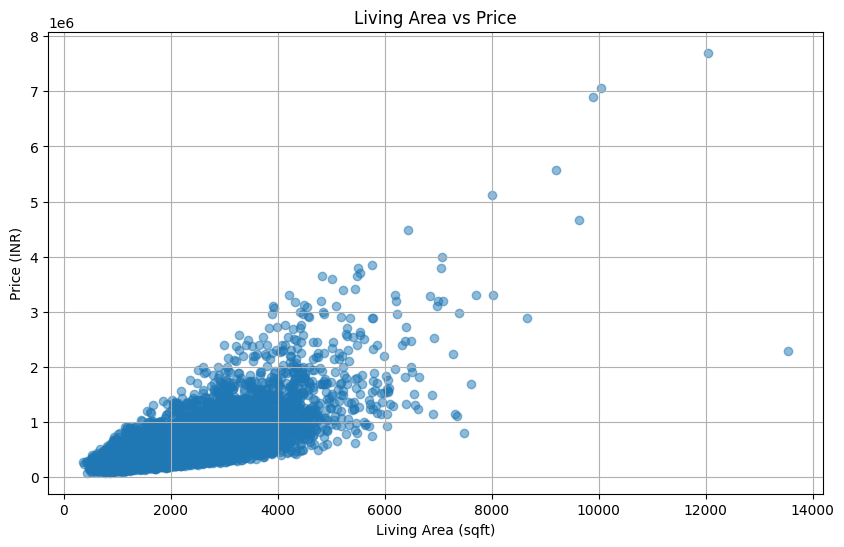

In [7]:

plt.figure(figsize=(10, 6))
plt.scatter(data['living area'], data['Price'], alpha=0.5)
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


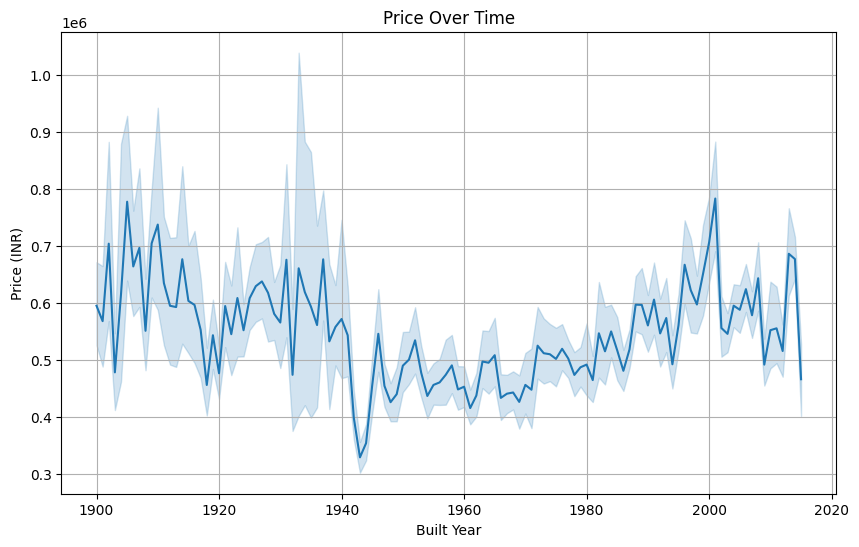

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Built Year', y='Price')
plt.title('Price Over Time')
plt.xlabel('Built Year')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


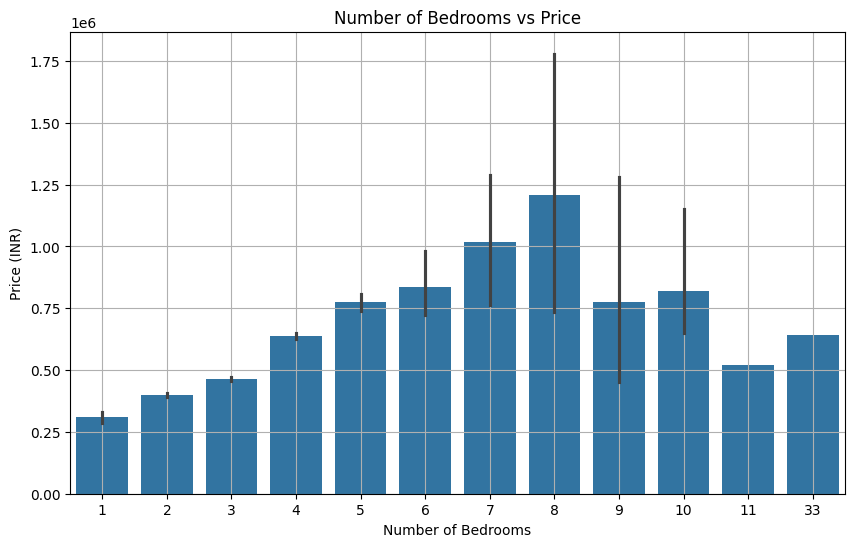

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['number of bedrooms'], y=data['Price'])
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=data[['number of bedrooms','number of floors','number of bathrooms','living area','lot area','condition of the house','grade of the house','Area of the house(excluding basement)','Built Year','Postal Code']]
y=data['Price']
x_scaled=scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()
# model.fit(x_train,y_train)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred_log_reg)

# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier()
# model.fit(x_train,y_train)
# y_pred_rf=model.predict(x_test)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test,y_pred_rf))

np.float64(53885796134.06812)

In [13]:
r_squared=model.score(x_test,y_test)
print("Regression of the model in Percentage is:",r_squared*100)

Regression of the model in Percentage is: 63.58971183826414


In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error of the model is:",mse)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 Score of the model is:",r2)

Mean Squared Error of the model is: 53885796134.06812
R2 Score of the model is: 0.6358971183826414


In [15]:
w=model.coef_
print("Coefficient of the model is:",w)
b=model.intercept_
print("Intercept of the model is:",b)

Coefficient of the model is: [ -42767.10865956   13704.16289903   35754.51117376  184863.57317363
  -11097.20413648   14480.37783149  151437.31961512  -13346.71373322
 -113684.41879466  -10811.74859902]
Intercept of the model is: 538132.4047570829


In [16]:
def predict(x,b):
    return np.dot(x,w)+b
    return resultA


In [17]:
# input = [
#     [number_of_bedrooms, number_of_floors, number_of_bathrooms, living_area, lot_area, 
#      condition_of_the_house, grade_of_the_house, area_of_the_house_excluding_basement, 
#      built_year, postal_code]
# ]
input = [[4, 2, 3, 2500, 4000, 5, 7, 2000, 1990, 11000]]
result = predict(input, b)
print("Predicted Price of the house is:", result)

Predicted Price of the house is: [47549659.88696353]
